In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards

In [30]:
tlog = pd.read_json("../../outputs/dynarmlogs/trainheuractive.jsonl", orient='records', lines=True)

In [31]:
tmp = tlog.dropna(subset=['reuses'])

In [55]:
rat = 0
ngs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    ngs.append(row['golds'])
    if row['thresh']!=0 and ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
tmp['golds'] = ngs
print(rat/len(tmp))

0.38636363636363635


/tmp/ipykernel_2463794/265282859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['golds'] = ngs


In [73]:
tot, corr = 0, 0
vals = []
for j in range(0, len(tmp), 50):
    # check heuristic accuracy
    for i, row in tmp.iloc[j:j+50].iterrows():
        # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
        tot = tot+1
        corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    vals.append(corr/tot)

In [99]:
1.2**22

55.2061438912436

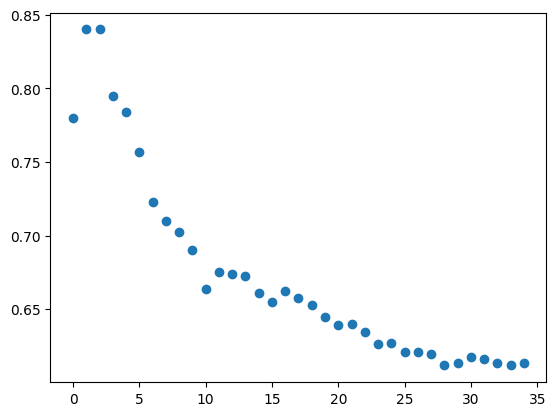

In [75]:
plt.scatter(range(len(vals)), vals)

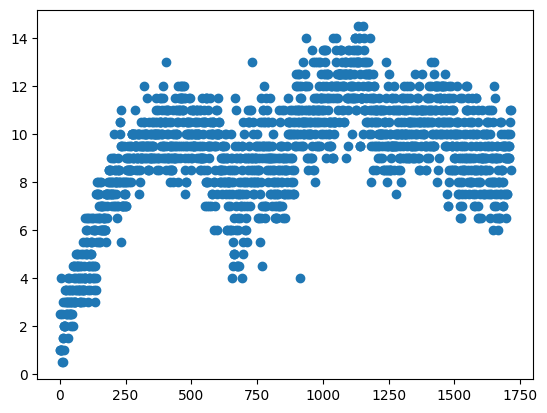

In [40]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)